# Linear Regression:

This is the first model tested for Used Car Price Prediction

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Different brands and models were concatenated to one dataframe

In [2]:
# Read and concatenate all CSV's

path = r'D:\Data_Analytics\Project 3\Data'
all_files = glob.glob(path + "/*.csv")

li = []
brands = ["Audi","Skoda","BMW","Volkswagen","Toyota","Mercedes Benz","Ford","Hyundi"]

for filename, brand in zip(all_files, brands):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["make"] = brand
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=True)
frame


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
85551,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
85552,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
85553,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


# Pipeline

Categorical and Numeric Features were preprocessed separately

In [3]:
# define numeric features
num_features = ['year','mileage',
                    'tax','mpg',
                    'engineSize']

# Pipeline steps to transform numeric features
num_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 3)),
                                      ('scaler', StandardScaler())])

In [4]:
# define categorical features
cat_features = ['model','transmission','fuelType','make']

# Pipeline to transform (encode) categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [5]:
# Use "ColumnTransformer" to join both categorical and numeric pipelines

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [6]:
# Create a pipeline that execute "preprocessor" and the LinearRegression model

regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Training & Evaluating 

In [7]:
# Define X, y

X = frame.drop('price', axis = 1)
y = frame['price']

# Split X,y into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=True,
                                                                                      interaction_only=False,
                                                                                      order='C')),
                                                                  ('scaler',
                                                                   Sta

In [8]:
# Evaluate the model for train data
regression.score(X_train, y_train)

0.9176251962897449

In [9]:
# Evaluate the model for test data
regression.score(X_test, y_test)

0.9011010996731806

# Residual Plot

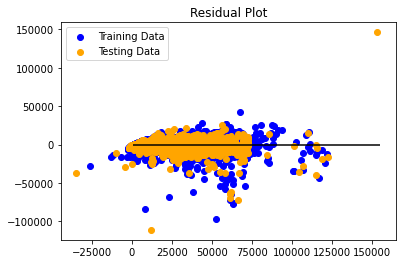

In [10]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
predictions = regression.predict(X_test)
plt.scatter(regression.predict(X_train), regression.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regression.predict(X_test), regression.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Predictions

In [21]:
# predictions with test data
encoded_prediction= regression.predict(X_test[:5])
# Actual data
actual = list(y_test[:5])

print(f"Predicted classes: {encoded_prediction}")
print(f"Actual Labels: {actual}")

Predicted classes: [ 7287.7766612   8371.10980342 13447.54051678  9230.10463922
 19685.18910482]
Actual Labels: [7990, 9000, 13000, 8947, 16995]
